## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [3]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [4]:
#為了解決 model.fit 當掉問題
#（OMP: Error #15: multiple copies of the OpenMP）
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [5]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [6]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [7]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=256, activation="relu")(input_layer)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    x = keras.layers.Dense(units=64, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

# 用 Keras 內建方法檢視模型各層參數量
model.summary()


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               786688    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 828,490
Trainable params: 828,490
Non-trainable params: 0
_________________________________________________________________


In [8]:
"""
Compile 模型
"""
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [9]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 37s 743us/step - loss: 1.9560 - acc: 0.2961 - val_loss: 1.8196 - val_acc: 0.3573
Epoch 2/500
50000/50000 [==============================] - 26s 515us/step - loss: 1.7498 - acc: 0.3743 - val_loss: 1.6998 - val_acc: 0.3875
Epoch 3/500
50000/50000 [==============================] - 25s 506us/step - loss: 1.6552 - acc: 0.4094 - val_loss: 1.6328 - val_acc: 0.4220
Epoch 4/500
50000/50000 [==============================] - 25s 495us/step - loss: 1.5947 - acc: 0.4320 - val_loss: 1.5800 - val_acc: 0.4357
Epoch 5/500
50000/50000 [==============================] - 25s 508us/step - loss: 1.5496 - acc: 0.4473 - val_loss: 1.5543 - val_acc: 0.4480
Epoch 6/500
50000/50000 [==============================] - 26s 517us/step - loss: 1.5127 - acc: 0.4601 - val_loss: 1.5113 - val_acc: 0.4643
Epoch 7/500
50000/50000 [==============================] - 26s

Epoch 57/500
50000/50000 [==============================] - 27s 544us/step - loss: 0.9305 - acc: 0.6668 - val_loss: 1.5038 - val_acc: 0.5147
Epoch 58/500
50000/50000 [==============================] - 24s 488us/step - loss: 0.9265 - acc: 0.6681 - val_loss: 1.5215 - val_acc: 0.5159
Epoch 59/500
50000/50000 [==============================] - 25s 499us/step - loss: 0.9240 - acc: 0.6680 - val_loss: 1.5270 - val_acc: 0.5129
Epoch 60/500
50000/50000 [==============================] - 24s 490us/step - loss: 0.9184 - acc: 0.6704 - val_loss: 1.5313 - val_acc: 0.5172
Epoch 61/500
50000/50000 [==============================] - 24s 490us/step - loss: 0.9083 - acc: 0.6740 - val_loss: 1.6382 - val_acc: 0.4948
Epoch 62/500
50000/50000 [==============================] - 25s 494us/step - loss: 0.9026 - acc: 0.6754 - val_loss: 1.5154 - val_acc: 0.5139
Epoch 63/500
50000/50000 [==============================] - 25s 496us/step - loss: 0.8956 - acc: 0.6797 - val_loss: 1.5596 - val_acc: 0.5058
Epoch 64/500


Epoch 115/500
50000/50000 [==============================] - 23s 464us/step - loss: 0.6794 - acc: 0.7544 - val_loss: 2.0118 - val_acc: 0.4951
Epoch 116/500
50000/50000 [==============================] - 23s 461us/step - loss: 0.6613 - acc: 0.7622 - val_loss: 1.9991 - val_acc: 0.4935
Epoch 117/500
50000/50000 [==============================] - 23s 460us/step - loss: 0.6467 - acc: 0.7685 - val_loss: 2.0071 - val_acc: 0.5058
Epoch 118/500
50000/50000 [==============================] - 23s 461us/step - loss: 0.6416 - acc: 0.7667 - val_loss: 2.0628 - val_acc: 0.4961
Epoch 119/500
50000/50000 [==============================] - 23s 458us/step - loss: 0.6471 - acc: 0.7666 - val_loss: 2.0275 - val_acc: 0.5011
Epoch 120/500
50000/50000 [==============================] - 23s 465us/step - loss: 0.6449 - acc: 0.7691 - val_loss: 2.0261 - val_acc: 0.4954
Epoch 121/500
50000/50000 [==============================] - 23s 463us/step - loss: 0.6399 - acc: 0.7689 - val_loss: 2.0272 - val_acc: 0.4989
Epoch 

50000/50000 [==============================] - 23s 466us/step - loss: 0.5154 - acc: 0.8125 - val_loss: 2.4963 - val_acc: 0.4833
Epoch 173/500
50000/50000 [==============================] - 23s 469us/step - loss: 0.5275 - acc: 0.8103 - val_loss: 2.4714 - val_acc: 0.4883
Epoch 174/500
50000/50000 [==============================] - 23s 464us/step - loss: 0.5182 - acc: 0.8126 - val_loss: 2.5227 - val_acc: 0.4954
Epoch 175/500
50000/50000 [==============================] - 23s 463us/step - loss: 0.5031 - acc: 0.8184 - val_loss: 2.5380 - val_acc: 0.4878
Epoch 176/500
50000/50000 [==============================] - 23s 458us/step - loss: 0.5141 - acc: 0.8150 - val_loss: 2.6384 - val_acc: 0.4680
Epoch 177/500
50000/50000 [==============================] - 23s 466us/step - loss: 0.4996 - acc: 0.8196 - val_loss: 2.5794 - val_acc: 0.4829
Epoch 178/500
50000/50000 [==============================] - 24s 473us/step - loss: 0.5037 - acc: 0.8189 - val_loss: 2.5934 - val_acc: 0.4856
Epoch 179/500
50000/

Epoch 230/500
50000/50000 [==============================] - 25s 506us/step - loss: 0.3966 - acc: 0.8569 - val_loss: 3.0304 - val_acc: 0.4753
Epoch 231/500
50000/50000 [==============================] - 27s 533us/step - loss: 0.4147 - acc: 0.8510 - val_loss: 3.0000 - val_acc: 0.4801
Epoch 232/500
50000/50000 [==============================] - 25s 490us/step - loss: 0.4055 - acc: 0.8547 - val_loss: 2.9472 - val_acc: 0.4869
Epoch 233/500
50000/50000 [==============================] - 23s 463us/step - loss: 0.4167 - acc: 0.8500 - val_loss: 2.9786 - val_acc: 0.4862
Epoch 234/500
50000/50000 [==============================] - 23s 465us/step - loss: 0.3944 - acc: 0.8575 - val_loss: 3.0161 - val_acc: 0.4790
Epoch 235/500
50000/50000 [==============================] - 23s 463us/step - loss: 0.4128 - acc: 0.8501 - val_loss: 3.0492 - val_acc: 0.4790
Epoch 236/500
50000/50000 [==============================] - 23s 465us/step - loss: 0.4229 - acc: 0.8469 - val_loss: 3.0203 - val_acc: 0.4731
Epoch 

Epoch 288/500
50000/50000 [==============================] - 23s 467us/step - loss: 0.3582 - acc: 0.8730 - val_loss: 3.4244 - val_acc: 0.4776
Epoch 289/500
50000/50000 [==============================] - 23s 468us/step - loss: 0.3259 - acc: 0.8832 - val_loss: 3.3368 - val_acc: 0.4775
Epoch 290/500
50000/50000 [==============================] - 23s 462us/step - loss: 0.3539 - acc: 0.8718 - val_loss: 3.4068 - val_acc: 0.4754
Epoch 291/500
50000/50000 [==============================] - 23s 461us/step - loss: 0.3679 - acc: 0.8656 - val_loss: 3.3309 - val_acc: 0.4794
Epoch 292/500
50000/50000 [==============================] - 23s 460us/step - loss: 0.3390 - acc: 0.8773 - val_loss: 3.3380 - val_acc: 0.4857
Epoch 293/500
50000/50000 [==============================] - 23s 462us/step - loss: 0.3526 - acc: 0.8737 - val_loss: 3.3238 - val_acc: 0.4779
Epoch 294/500
50000/50000 [==============================] - 23s 465us/step - loss: 0.3645 - acc: 0.8682 - val_loss: 3.3779 - val_acc: 0.4751
Epoch 

Epoch 346/500
50000/50000 [==============================] - 23s 463us/step - loss: 0.3221 - acc: 0.8850 - val_loss: 3.6435 - val_acc: 0.4693
Epoch 347/500
50000/50000 [==============================] - 23s 461us/step - loss: 0.3065 - acc: 0.8887 - val_loss: 3.7254 - val_acc: 0.4720
Epoch 348/500
50000/50000 [==============================] - 32s 636us/step - loss: 0.2992 - acc: 0.8922 - val_loss: 3.7294 - val_acc: 0.4690
Epoch 349/500
50000/50000 [==============================] - 23s 468us/step - loss: 0.2708 - acc: 0.9040 - val_loss: 3.7762 - val_acc: 0.4758
Epoch 350/500
50000/50000 [==============================] - 24s 481us/step - loss: 0.3060 - acc: 0.8904 - val_loss: 3.6999 - val_acc: 0.4795
Epoch 351/500
50000/50000 [==============================] - 23s 464us/step - loss: 0.3067 - acc: 0.8903 - val_loss: 3.7517 - val_acc: 0.4730
Epoch 352/500
50000/50000 [==============================] - 24s 488us/step - loss: 0.3366 - acc: 0.8801 - val_loss: 3.6949 - val_acc: 0.4716
Epoch 

Epoch 404/500
50000/50000 [==============================] - 23s 466us/step - loss: 0.2650 - acc: 0.9064 - val_loss: 3.9809 - val_acc: 0.4687
Epoch 405/500
50000/50000 [==============================] - 23s 469us/step - loss: 0.2655 - acc: 0.9047 - val_loss: 4.0100 - val_acc: 0.4737
Epoch 406/500
50000/50000 [==============================] - 23s 469us/step - loss: 0.2886 - acc: 0.8973 - val_loss: 3.9215 - val_acc: 0.4727
Epoch 407/500
50000/50000 [==============================] - 23s 461us/step - loss: 0.2812 - acc: 0.8990 - val_loss: 3.9870 - val_acc: 0.4735
Epoch 408/500
50000/50000 [==============================] - 23s 461us/step - loss: 0.2292 - acc: 0.9195 - val_loss: 4.0343 - val_acc: 0.4740
Epoch 409/500
50000/50000 [==============================] - 23s 461us/step - loss: 0.2251 - acc: 0.9204 - val_loss: 4.0239 - val_acc: 0.4776
Epoch 410/500
50000/50000 [==============================] - 23s 459us/step - loss: 0.2509 - acc: 0.9100 - val_loss: 4.1408 - val_acc: 0.4590
Epoch 

Epoch 462/500
50000/50000 [==============================] - 23s 455us/step - loss: 0.2205 - acc: 0.9213 - val_loss: 4.2320 - val_acc: 0.4717
Epoch 463/500
50000/50000 [==============================] - 23s 457us/step - loss: 0.2329 - acc: 0.9160 - val_loss: 4.2606 - val_acc: 0.4676
Epoch 464/500
50000/50000 [==============================] - 23s 453us/step - loss: 0.2881 - acc: 0.8979 - val_loss: 4.1796 - val_acc: 0.4695
Epoch 465/500
50000/50000 [==============================] - 23s 451us/step - loss: 0.2484 - acc: 0.9107 - val_loss: 4.2091 - val_acc: 0.4663
Epoch 466/500
50000/50000 [==============================] - 23s 451us/step - loss: 0.2537 - acc: 0.9095 - val_loss: 4.2373 - val_acc: 0.4743
Epoch 467/500
50000/50000 [==============================] - 23s 452us/step - loss: 0.2274 - acc: 0.9191 - val_loss: 4.2774 - val_acc: 0.4699
Epoch 468/500
50000/50000 [==============================] - 23s 456us/step - loss: 0.2391 - acc: 0.9155 - val_loss: 4.3185 - val_acc: 0.4747
Epoch 

In [10]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

## 2. 將 Optimizer 換成 SGD

In [13]:
model2 = build_mlp()
optimizer = keras.optimizers.SGD(lr=0.001)
model2.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model2.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 28s 568us/step - loss: 2.2883 - acc: 0.1255 - val_loss: 2.2415 - val_acc: 0.1706
Epoch 2/500
50000/50000 [==============================] - 20s 398us/step - loss: 2.2198 - acc: 0.1914 - val_loss: 2.1969 - val_acc: 0.2070
Epoch 3/500
50000/50000 [==============================] - 19s 385us/step - loss: 2.1812 - acc: 0.2171 - val_loss: 2.1622 - val_acc: 0.2253
Epoch 4/500
50000/50000 [==============================] - 19s 380us/step - loss: 2.1486 - acc: 0.2286 - val_loss: 2.1308 - val_acc: 0.2358
Epoch 5/500
50000/50000 [==============================] - 18s 366us/step - loss: 2.1179 - acc: 0.2382 - val_loss: 2.1011 - val_acc: 0.2454
Epoch 6/500
50000/50000 [==============================] - 18s 354us/step - loss: 2.0883 - acc: 0.2479 - val_loss: 2.0717 - val_acc: 0.2526
Epoch 7/500
50000/50000 [==============================] - 17s 331us/step - loss: 2.0585 - acc: 0.2592 - val_l

Epoch 59/500
50000/50000 [==============================] - 17s 346us/step - loss: 1.7034 - acc: 0.4009 - val_loss: 1.7062 - val_acc: 0.3995
Epoch 60/500
50000/50000 [==============================] - 17s 347us/step - loss: 1.7000 - acc: 0.4025 - val_loss: 1.7036 - val_acc: 0.4010
Epoch 61/500
50000/50000 [==============================] - 18s 352us/step - loss: 1.6970 - acc: 0.4033 - val_loss: 1.7018 - val_acc: 0.3988
Epoch 62/500
50000/50000 [==============================] - 17s 349us/step - loss: 1.6940 - acc: 0.4044 - val_loss: 1.6963 - val_acc: 0.4034
Epoch 63/500
50000/50000 [==============================] - 18s 356us/step - loss: 1.6909 - acc: 0.4052 - val_loss: 1.6960 - val_acc: 0.4040
Epoch 64/500
50000/50000 [==============================] - 19s 374us/step - loss: 1.6880 - acc: 0.4070 - val_loss: 1.6911 - val_acc: 0.4034
Epoch 65/500
50000/50000 [==============================] - 18s 363us/step - loss: 1.6849 - acc: 0.4076 - val_loss: 1.6904 - val_acc: 0.4046
Epoch 66/500


Epoch 117/500
50000/50000 [==============================] - 16s 322us/step - loss: 1.5667 - acc: 0.4505 - val_loss: 1.5837 - val_acc: 0.4392
Epoch 118/500
50000/50000 [==============================] - 16s 320us/step - loss: 1.5649 - acc: 0.4536 - val_loss: 1.5844 - val_acc: 0.4361
Epoch 119/500
50000/50000 [==============================] - 16s 320us/step - loss: 1.5630 - acc: 0.4521 - val_loss: 1.5869 - val_acc: 0.4353
Epoch 120/500
50000/50000 [==============================] - 16s 321us/step - loss: 1.5615 - acc: 0.4528 - val_loss: 1.5786 - val_acc: 0.4404
Epoch 121/500
50000/50000 [==============================] - 16s 323us/step - loss: 1.5594 - acc: 0.4538 - val_loss: 1.5793 - val_acc: 0.4376
Epoch 122/500
50000/50000 [==============================] - 16s 321us/step - loss: 1.5578 - acc: 0.4554 - val_loss: 1.5756 - val_acc: 0.4405
Epoch 123/500
50000/50000 [==============================] - 16s 320us/step - loss: 1.5560 - acc: 0.4558 - val_loss: 1.5759 - val_acc: 0.4379
Epoch 

Epoch 175/500
50000/50000 [==============================] - 16s 321us/step - loss: 1.4728 - acc: 0.4837 - val_loss: 1.5098 - val_acc: 0.4618
Epoch 176/500
50000/50000 [==============================] - 16s 326us/step - loss: 1.4716 - acc: 0.4857 - val_loss: 1.5069 - val_acc: 0.4664
Epoch 177/500
50000/50000 [==============================] - 16s 322us/step - loss: 1.4702 - acc: 0.4857 - val_loss: 1.5139 - val_acc: 0.4585
Epoch 178/500
50000/50000 [==============================] - 16s 324us/step - loss: 1.4686 - acc: 0.4855 - val_loss: 1.5079 - val_acc: 0.4642
Epoch 179/500
50000/50000 [==============================] - 16s 325us/step - loss: 1.4672 - acc: 0.4879 - val_loss: 1.5088 - val_acc: 0.4611
Epoch 180/500
50000/50000 [==============================] - 16s 325us/step - loss: 1.4658 - acc: 0.4869 - val_loss: 1.5100 - val_acc: 0.4584
Epoch 181/500
50000/50000 [==============================] - 16s 319us/step - loss: 1.4645 - acc: 0.4872 - val_loss: 1.5018 - val_acc: 0.4650
Epoch 

Epoch 233/500
50000/50000 [==============================] - 17s 333us/step - loss: 1.3940 - acc: 0.5125 - val_loss: 1.4610 - val_acc: 0.4802
Epoch 234/500
50000/50000 [==============================] - 16s 324us/step - loss: 1.3931 - acc: 0.5131 - val_loss: 1.4620 - val_acc: 0.4795
Epoch 235/500
50000/50000 [==============================] - 16s 328us/step - loss: 1.3917 - acc: 0.5146 - val_loss: 1.4591 - val_acc: 0.4792
Epoch 236/500
50000/50000 [==============================] - 16s 325us/step - loss: 1.3907 - acc: 0.5147 - val_loss: 1.4552 - val_acc: 0.4816
Epoch 237/500
50000/50000 [==============================] - 16s 324us/step - loss: 1.3894 - acc: 0.5151 - val_loss: 1.4556 - val_acc: 0.4826
Epoch 238/500
50000/50000 [==============================] - 16s 321us/step - loss: 1.3879 - acc: 0.5148 - val_loss: 1.4499 - val_acc: 0.4817
Epoch 239/500
50000/50000 [==============================] - 16s 324us/step - loss: 1.3868 - acc: 0.5152 - val_loss: 1.4511 - val_acc: 0.4815
Epoch 

Epoch 291/500
50000/50000 [==============================] - 16s 323us/step - loss: 1.3271 - acc: 0.5363 - val_loss: 1.4224 - val_acc: 0.4871
Epoch 292/500
50000/50000 [==============================] - 17s 339us/step - loss: 1.3257 - acc: 0.5369 - val_loss: 1.4123 - val_acc: 0.4953
Epoch 293/500
50000/50000 [==============================] - 18s 361us/step - loss: 1.3245 - acc: 0.5372 - val_loss: 1.4193 - val_acc: 0.4951
Epoch 294/500
50000/50000 [==============================] - 18s 352us/step - loss: 1.3235 - acc: 0.5365 - val_loss: 1.4194 - val_acc: 0.4899
Epoch 295/500
50000/50000 [==============================] - 18s 365us/step - loss: 1.3223 - acc: 0.5382 - val_loss: 1.4239 - val_acc: 0.4957
Epoch 296/500
50000/50000 [==============================] - 18s 362us/step - loss: 1.3219 - acc: 0.5375 - val_loss: 1.4326 - val_acc: 0.4908
Epoch 297/500
50000/50000 [==============================] - 19s 374us/step - loss: 1.3207 - acc: 0.5387 - val_loss: 1.4097 - val_acc: 0.4950
Epoch 

Epoch 349/500
50000/50000 [==============================] - 16s 325us/step - loss: 1.2677 - acc: 0.5557 - val_loss: 1.3925 - val_acc: 0.5065
Epoch 350/500
50000/50000 [==============================] - 16s 327us/step - loss: 1.2671 - acc: 0.5557 - val_loss: 1.3928 - val_acc: 0.5043
Epoch 351/500
50000/50000 [==============================] - 16s 328us/step - loss: 1.2656 - acc: 0.5563 - val_loss: 1.3917 - val_acc: 0.5029
Epoch 352/500
50000/50000 [==============================] - 16s 324us/step - loss: 1.2644 - acc: 0.5560 - val_loss: 1.3875 - val_acc: 0.5061
Epoch 353/500
50000/50000 [==============================] - 16s 329us/step - loss: 1.2644 - acc: 0.5562 - val_loss: 1.4048 - val_acc: 0.5032
Epoch 354/500
50000/50000 [==============================] - 16s 324us/step - loss: 1.2628 - acc: 0.5568 - val_loss: 1.3976 - val_acc: 0.5019
Epoch 355/500
50000/50000 [==============================] - 16s 326us/step - loss: 1.2615 - acc: 0.5572 - val_loss: 1.3902 - val_acc: 0.5050
Epoch 

Epoch 407/500
50000/50000 [==============================] - 16s 323us/step - loss: 1.2152 - acc: 0.5716 - val_loss: 1.3747 - val_acc: 0.5106
Epoch 408/500
50000/50000 [==============================] - 16s 320us/step - loss: 1.2139 - acc: 0.5736 - val_loss: 1.3905 - val_acc: 0.5072
Epoch 409/500
50000/50000 [==============================] - 16s 329us/step - loss: 1.2124 - acc: 0.5736 - val_loss: 1.3732 - val_acc: 0.5096
Epoch 410/500
50000/50000 [==============================] - 16s 323us/step - loss: 1.2116 - acc: 0.5739 - val_loss: 1.3964 - val_acc: 0.5037
Epoch 411/500
50000/50000 [==============================] - 17s 332us/step - loss: 1.2113 - acc: 0.5755 - val_loss: 1.3699 - val_acc: 0.5156
Epoch 412/500
50000/50000 [==============================] - 16s 325us/step - loss: 1.2111 - acc: 0.5741 - val_loss: 1.3819 - val_acc: 0.5068
Epoch 413/500
50000/50000 [==============================] - 16s 323us/step - loss: 1.2093 - acc: 0.5756 - val_loss: 1.3670 - val_acc: 0.5151
Epoch 

Epoch 465/500
50000/50000 [==============================] - 16s 321us/step - loss: 1.1656 - acc: 0.5904 - val_loss: 1.3729 - val_acc: 0.5111
Epoch 466/500
50000/50000 [==============================] - 16s 324us/step - loss: 1.1654 - acc: 0.5903 - val_loss: 1.3615 - val_acc: 0.5175
Epoch 467/500
50000/50000 [==============================] - 16s 326us/step - loss: 1.1650 - acc: 0.5898 - val_loss: 1.3587 - val_acc: 0.5194
Epoch 468/500
50000/50000 [==============================] - 16s 326us/step - loss: 1.1641 - acc: 0.5900 - val_loss: 1.3575 - val_acc: 0.5204
Epoch 469/500
50000/50000 [==============================] - 16s 320us/step - loss: 1.1631 - acc: 0.5907 - val_loss: 1.3607 - val_acc: 0.5144
Epoch 470/500
50000/50000 [==============================] - 16s 320us/step - loss: 1.1615 - acc: 0.5914 - val_loss: 1.3818 - val_acc: 0.5144
Epoch 471/500
50000/50000 [==============================] - 16s 321us/step - loss: 1.1599 - acc: 0.5918 - val_loss: 1.3608 - val_acc: 0.5171
Epoch 

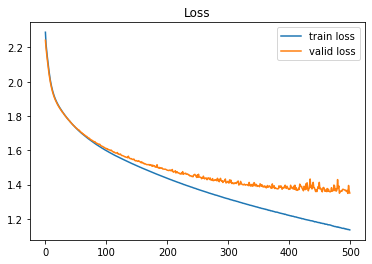

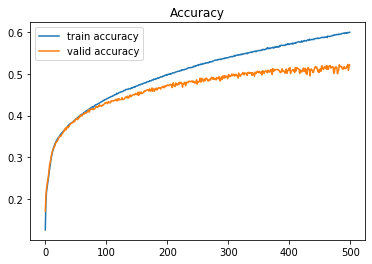

In [14]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model2.history.history["loss"]
valid_loss = model2.history.history["val_loss"]

train_acc = model2.history.history["acc"]
valid_acc = model2.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()